In [1]:
from skimage.transform import radon, iradon
import pydicom as dicom
import numpy as np
import os
from glob import glob
import re
import matplotlib.pyplot as plt

In [2]:
path = "../data/dicom"

In [3]:
high_metal_folder = [
            sorted(
                glob(
                    os.path.join(path, "high_metal/acquisition_" + str(i) + "/*")
                ),
                key=lambda x: [
                    int(c) if c.isdigit() else c for c in re.split(r"(\d+)", x)
                ],
            )
            for i in range(11)
        ]


no_metal_folder = [
            sorted(
                glob(
                    os.path.join(path, "no_metal/acquisition_" + str(i) + "/*")
                ),
                key=lambda x: [
                    int(c) if c.isdigit() else c for c in re.split(r"(\d+)", x)
                ],
            )
            for i in range(11)
        ]



print(high_metal_folder[1][:5])
print(no_metal_folder[1][:5])

['../data/dicom/high_metal/acquisition_1/001.dcm', '../data/dicom/high_metal/acquisition_1/002.dcm', '../data/dicom/high_metal/acquisition_1/003.dcm', '../data/dicom/high_metal/acquisition_1/004.dcm', '../data/dicom/high_metal/acquisition_1/005.dcm']
['../data/dicom/no_metal/acquisition_1/001.dcm', '../data/dicom/no_metal/acquisition_1/002.dcm', '../data/dicom/no_metal/acquisition_1/003.dcm', '../data/dicom/no_metal/acquisition_1/004.dcm', '../data/dicom/no_metal/acquisition_1/005.dcm']


In [4]:
y = dicom.dcmread(high_metal_folder[3][65]).pixel_array
y.shape

(588, 588)

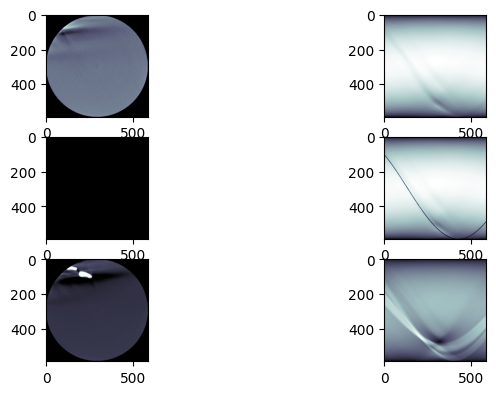

In [35]:
y = dicom.dcmread(high_metal_folder[3][65]).pixel_array
x = dicom.dcmread(no_metal_folder[3][65]).pixel_array
theta = np.linspace(0.0, 180.0, max(y.shape), endpoint=False)
y = y / max(y.flatten()) 
metal = y >=1
sinogram_y = radon(y, theta=theta, circle=True)
sinogram_metal = radon(metal, theta=theta, circle=True)
sinogram_without_metal = (1-sinogram_metal>=1)*sinogram_y
fig, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(8, 4.5))
ax1[0].imshow(y, cmap=plt.cm.bone)
ax2[0].imshow(metal, cmap=plt.cm.bone, )
ax3[0].imshow(x, cmap=plt.cm.bone)

ax1[1].imshow(sinogram_y, cmap=plt.cm.bone)
ax2[1].imshow(sinogram_without_metal, cmap=plt.cm.bone)
ax3[1].imshow(radon(x, theta, circle = True), cmap=plt.cm.bone)


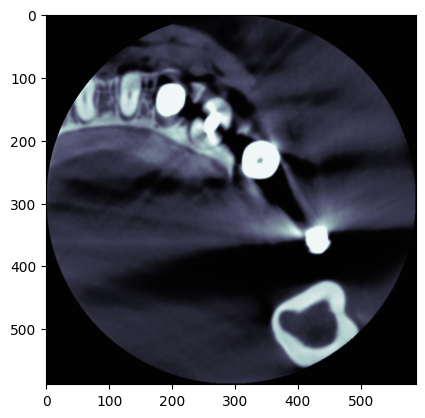

In [18]:
y = dicom.dcmread(high_metal_folder[1][200])
x = radon(y.pixel_array, theta=theta, circle=True)
x = iradon(x, theta=theta, circle=True)
plt.imshow(x, cmap=plt.cm.bone)

In [21]:
y.PixelData = x.tobytes()
y.file_meta

(0002, 0000) File Meta Information Group Length  UL: 190
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113999.1002.3819720386.1186483369.17240855296369885117
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113999.42.6.0
(0002, 0013) Implementation Version Name         SH: 'CV_102'

In [12]:
y = dicom.dcmread(high_metal_folder[1][200])


AttributeError: 'Dataset' object has no attribute '_parent_encoding'